In [136]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from sklearn import metrics

from tensorflow.keras.models import load_model


from sklearn import metrics
import random as python_random
import numpy as np
from matplotlib import pyplot as plt
import math

In [42]:
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

In [43]:
# data_dir = 'data' 

train_dir = './transferdata/Train/'
test_dir = './transferdata/Test/'
val_dir = './transferdata/Val/'


In [44]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [46]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [47]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [48]:
for image_class in os.listdir(val_dir): 
    for image in os.listdir(os.path.join(val_dir, image_class)):
        image_path = os.path.join(val_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            # tip = imghdr.what(image_path)
            # if tip not in image_exts: 
            #     print('Image not in ext list {}'.format(image_path))
            #     os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

Total_train_data aangemaakt om balans tussen klassen in de set weer te geven

In [80]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable
total_train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=4000)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(224, 224),)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(224, 224), shuffle=True, batch_size=120)
val_data = tf.keras.utils.image_dataset_from_directory(val_dir, image_size=(224, 224), shuffle=True, batch_size=80)

Found 306 files belonging to 4 classes.
Found 306 files belonging to 4 classes.
Found 120 files belonging to 4 classes.
Found 76 files belonging to 4 classes.


In [81]:
for element in total_train_data.as_numpy_iterator(): 
    X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

{0: 93, 1: 54, 2: 91, 3: 68}

In [82]:
for element in test_data.as_numpy_iterator():         
    X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

{0: 30, 1: 24, 2: 38, 3: 28}

In [83]:
for element in val_data.as_numpy_iterator():         
    X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

{0: 23, 1: 13, 2: 23, 3: 17}

In [84]:
train_iterator = train_data.as_numpy_iterator()
test_iterator = test_data.as_numpy_iterator()
val_iterator = val_data.as_numpy_iterator()

In [85]:
train_batch = train_iterator.next()
test_batch = test_iterator.next()
val_batch = val_iterator.next()

# Visualise train test en val data

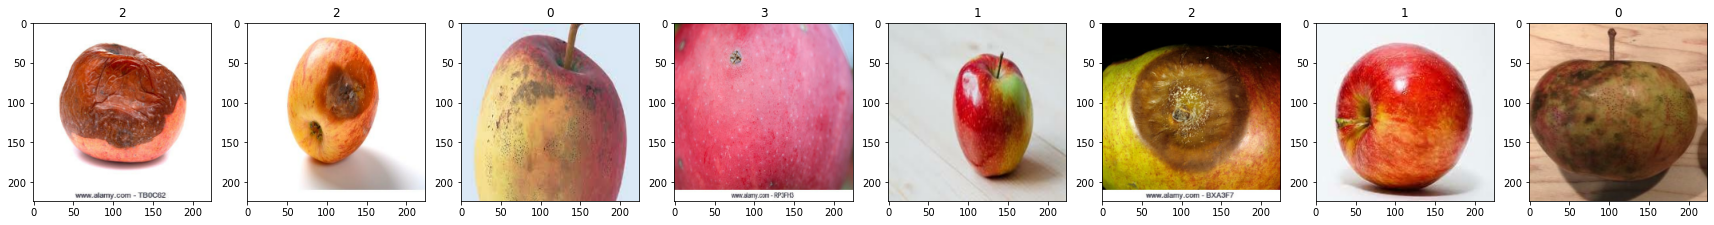

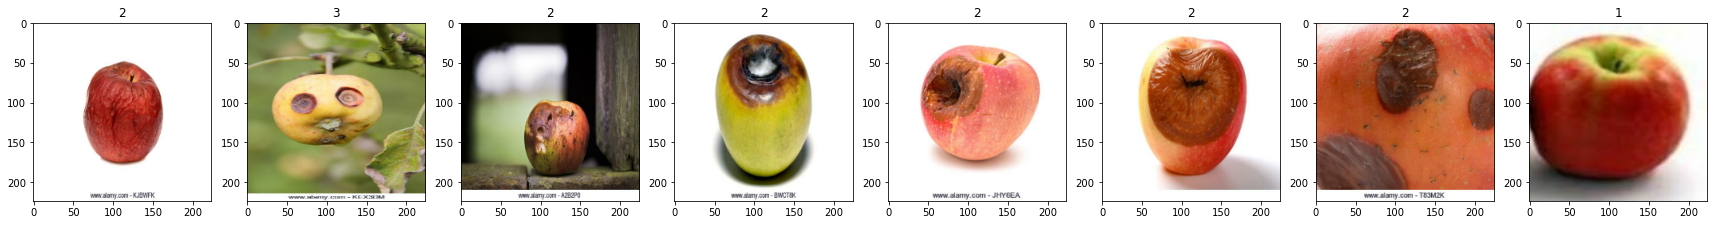

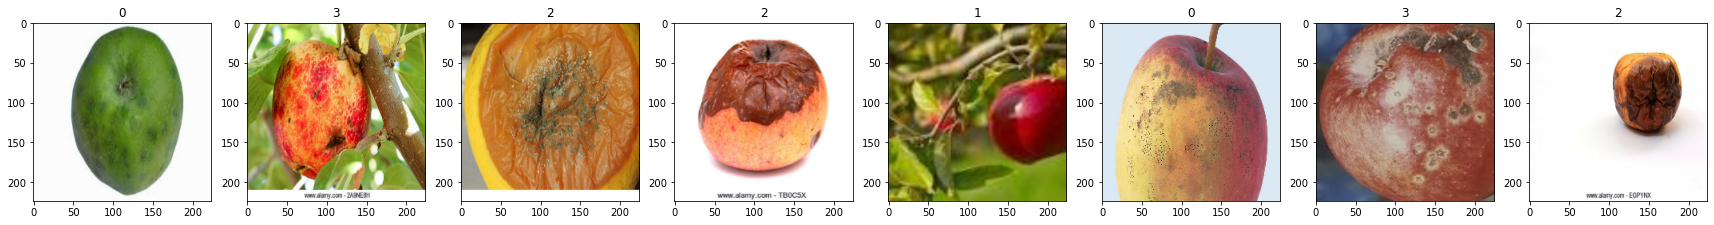

In [86]:
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(train_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(test_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])
    
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(val_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(val_batch[1][idx])

# Scale data

In [87]:
train_data = train_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))
val_data = val_data.map(lambda x,y: (x/255, y))

In [88]:
train_data.as_numpy_iterator().next()
test_data.as_numpy_iterator().next()
val_data.as_numpy_iterator().next()

(array([[[[9.76470590e-01, 9.76470590e-01, 9.76470590e-01],
          [9.79796946e-01, 9.79796946e-01, 9.79796946e-01],
          [9.88550425e-01, 9.88550425e-01, 9.88550425e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01]],
 
         [[9.75805283e-01, 9.75805283e-01, 9.75805283e-01],
          [9.79018807e-01, 9.79018807e-01, 9.79018807e-01],
          [9.87475276e-01, 9.87475276e-01, 9.87475276e-01],
          ...,
          [9.94082630e-01, 9.94082630e-01, 9.94082630e-01],
          [9.94082630e-01, 9.94082630e-01, 9.94082630e-01],
          [9.94082630e-01, 9.94082630e-01, 9.94082630e-01]],
 
         [[9.74054635e-01, 9.74054635e-01, 9.74054635e-01],
          [9.76971149e-01, 9.76971149e-01, 9.76971149e-01],
          [9.84646022e-01, 9.84646022e-01, 9.84646022e-01],
          ...,
          [9.88830507e-01, 9.88830507e-01, 9.8883

# split data

In [89]:
imageCountTrain = len(train_data)
print (imageCountTrain) # is 10 batches van 32 dus alle 306
imageCountTest = len(test_data) # is 1 batch van 120
print (imageCountTest)
imageCountVal = len(val_data) # is 1 batch van 80
print (imageCountVal)

10
1
1


In [90]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [91]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# Get and test Mobilenet v2 model

In [92]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


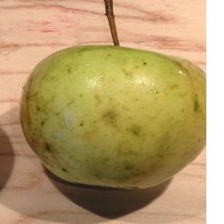

In [93]:
apple = Image.open("./transferdata/Use/111.jpg").resize(IMAGE_SHAPE)
apple


In [94]:
apple = np.array(apple)/255.0
apple.shape


(224, 224, 3)

In [95]:
apple[np.newaxis, ...]

array([[[[0.78431373, 0.61568627, 0.49019608],
         [0.77647059, 0.60784314, 0.48235294],
         [0.77647059, 0.60784314, 0.48235294],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.83137255, 0.6627451 , 0.5372549 ],
         [0.82745098, 0.65882353, 0.53333333],
         [0.83529412, 0.66666667, 0.54117647],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.87843137, 0.70980392, 0.58431373],
         [0.88235294, 0.71372549, 0.58823529],
         [0.87843137, 0.70980392, 0.58431373],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.8       , 0.63137255, 0.51764706],
         [0.80784314, 0.63921569, 0.5254902 ]

In [96]:
result = classifier.predict(apple[np.newaxis, ...])
result.shape

(1, 1001)

In [97]:
predicted_label_index = np.argmax(result)
predicted_label_index

957

In [37]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("./ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [38]:
image_labels[predicted_label_index]

'custard apple'

# retrain using the apples

In [98]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [79]:
num_of_apples = 4 # to set final layer

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_apples)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [99]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [100]:
logdir='logs'

In [101]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [102]:
# tf.random.set_seed(221)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
8/8 [==============================] - 8s 527ms/step - loss: 1.2728 - acc: 0.4492 - val_loss: 0.9630 - val_acc: 0.5400
Epoch 2/10
8/8 [==============================] - 4s 449ms/step - loss: 0.8641 - acc: 0.6641 - val_loss: 0.7139 - val_acc: 0.7600
Epoch 3/10
8/8 [==============================] - 4s 456ms/step - loss: 0.6118 - acc: 0.8320 - val_loss: 0.5125 - val_acc: 0.8400
Epoch 4/10
8/8 [==============================] - 4s 455ms/step - loss: 0.4635 - acc: 0.8750 - val_loss: 0.5200 - val_acc: 0.8400
Epoch 5/10
8/8 [==============================] - 4s 453ms/step - loss: 0.3934 - acc: 0.9062 - val_loss: 0.3432 - val_acc: 0.8600
Epoch 6/10
8/8 [==============================] - 4s 450ms/step - loss: 0.3282 - acc: 0.9258 - val_loss: 0.2408 - val_acc: 0.9400
Epoch 7/10
8/8 [==============================] - 4s 447ms/step - loss: 0.2897 - acc: 0.9453 - val_loss: 0.2542 - val_acc: 0.9200
Epoch 8/10
8/8 [==============================] - 4s 451ms/step - loss: 0.2729 - acc: 0.93

In [103]:
testscore = model.evaluate(test_data)
testscore

1/1 [==============================] - 2s 2s/step - loss: 0.7305 - acc: 0.7333


[0.7304823398590088, 0.7333333492279053]

# plot performance

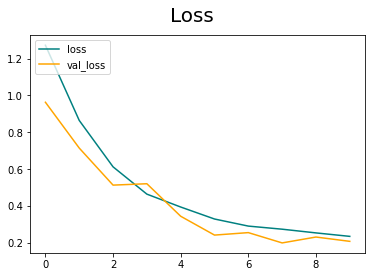

In [104]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [110]:
for element in test_data.as_numpy_iterator(): 
    X, y = element
    yhat = model.predict(X)
    pred = (np.argmax(yhat, axis=-1))
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)
    unique2, counts2 = np.unique(y, return_counts=True)
    dict(zip(unique2, counts2))
    # print (yhat)
    # print (y)

print (pred)

unique2, counts2 = np.unique(pred, return_counts=True)
dict(zip(unique2, counts2))

noInBatch= (len(pred))


[3 3 3 1 3 3 1 3 2 3 0 3 0 3 2 3 2 2 0 3 1 2 1 2 2 2 2 2 3 2 3 2 1 1 2 2 3
 2 3 2 3 0 0 3 0 3 3 1 0 2 1 2 2 3 2 2 2 2 2 3 3 1 2 2 1 0 1 1 2 2 0 3 2 0
 3 1 3 3 2 3 2 2 3 3 1 1 2 0 3 2 3 0 2 3 1 0 2 3 2 0 3 2 1 3 2 3 2 3 1 1 2
 0 3 0 2 0 3 2 0 3]


In [111]:
stats = dict(zip(unique2, counts2))
print (stats)

nbrBlotch = stats[0]
nbrNormal = stats[1]
nbrRot = stats[2]
nbrScab = stats[3]
nbrRej = int(nbrBlotch)+int(nbrRot)+int(nbrScab)

percBlotch = int(nbrBlotch)/int(noInBatch)*100
percNormal = int(nbrNormal)/int(noInBatch)*100
percRot = int(nbrRot)/int(noInBatch)*100
percScab = int(nbrScab)/int(noInBatch)*100
percRej = int(nbrRej)/int(noInBatch)*100

if noInBatch != 120:
    
    print ("Please offer a batch of 80 apples for a correct quality control")

else:
    if nbrNormal >= 119: #79:                                          
        batchStatus = (f'The batch has been qualified as: Class 1\n , this is suitable for supermarkets and greengrocers.')
    elif nbrNormal >= 112: #75:
        batchStatus = (f'The batch has been qualified as: Class 2\n , this is suitable to be used in apple sauce.')
    elif nbrNormal >= 109: #73:
         (f'The batch has been qualified as: Class 3\n, this is suitable to be used in apple syrup.')
    else:
        batchStatus = (f'The batch has been rejected\n, this is too bad for you.')
    
print (batchStatus)

print (noInBatch)
print (percRej)

{0: 18, 1: 19, 2: 43, 3: 40}
The batch has been rejected
, this is too bad for you.
120
84.16666666666667


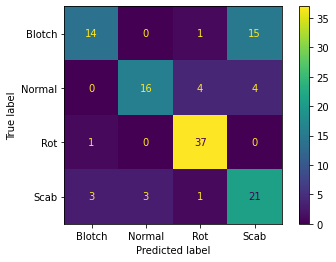

In [112]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [113]:
testscore = model.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.7305 - acc: 0.7333


# save and test load model

In [115]:
model.save(os.path.join('models','appleclassifier73transfer.h5'))

my_reloaded_model = tf.keras.models.load_model(
       (path),
custom_objects={'KerasLayer':hub.KerasLayer}

In [132]:
my_reloaded_model = tf.keras.models.load_model(
       ('./models/appleclassifier73transfer.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer})

In [133]:
my_reloaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [138]:
resize = tf.image.resize(img, (224,224))

In [139]:
yhat_new = my_reloaded_model.predict(np.expand_dims(resize/255, 0))

In [140]:
pred_new = np.argmax(yhat_new, axis=-1)

In [141]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts an apple with rot
